### Recommendation Engine


# Index
1:- EDA
2:- Rank Based recommendations
# Filtering
3:- user based collabrative 
4:- Content Based
# Factorization
5:- Matrix factorization


In [192]:
#Improting required lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import progressbar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [193]:
#change the path and read the csv
os.chdir("D:\\udacity\\Recommendatiob_engine\\datsets")
df=pd.read_csv('user-item-interactions.csv')
df_1=pd.read_csv('articles_community.csv')

Part1:-
EDA
In the below section i am going to perform EDA for the given datasets

In [194]:

df.head()

,Unnamed: 0,article_id,title,email
0,0,1430,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1,1314,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,2,1429,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,3,1338,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,4,1276,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [195]:
del df['Unnamed: 0']
df.head()

,article_id,title,email
0,1430,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [196]:
df_1.head()

,Unnamed: 0,doc_body,doc_description,doc_full_name,doc_status,article_id,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
del df_1['Unnamed: 0']
df_1.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
#check for null values
df.isnull().sum()


article_id     0
title          0
email         17
dtype: int64

In [199]:
df_1.isnull().sum()

doc_body           1515
doc_description    1784
doc_full_name      1846
doc_status         1876
article_id         1893
                   ... 
Unnamed: 60        2974
Unnamed: 61        2974
Unnamed: 62        2974
Unnamed: 63        2974
Unnamed: 64        2974
Length: 64, dtype: int64

In [200]:
#count user intrections
user_interact = df.email.value_counts(dropna=False)

In [201]:
user_interact.head()

email
2b6c0f514c2f2b04ad3c4583407dccd0810469ee    364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a    363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66    170
a37adec71b667b297ed2440a9ff7dad427c7ac85    169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93    160
Name: count, dtype: int64

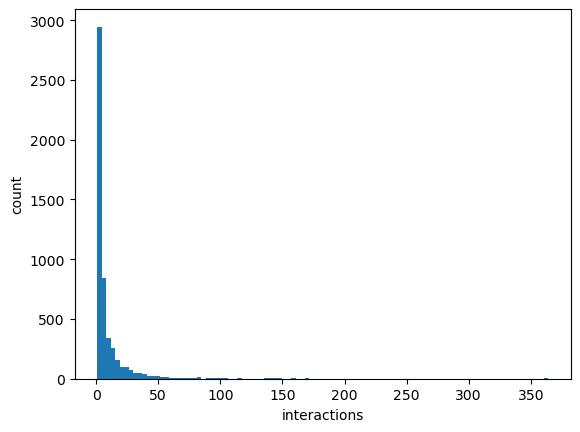

In [202]:
#distribution plot of user with article intraction
plt.figure()
plt.hist(user_interact.values, bins=100)
plt.xlabel('interactions')
plt.ylabel('count')
plt.show()

In [203]:
most_articles = df.article_id.value_counts(dropna=False)

cum_user = np.cumsum(most_articles.values)

In [204]:
# 50% of individuals interact with how many number of articles ?.
median_val = len(cum_user[cum_user <= len(user_interact)/2])

# The maximum number of user-article interactions by any 1 user is ?.
max_views_by_user = user_interact.iloc[0]

In [205]:
#Removing the duplicate article from df_1
art_count = df_1.article_id.value_counts(dropna=False)
dup_articles = art_count[art_count > 1]

print('number of duplicate articles is: ', len(dup_articles))

number of duplicate articles is:  8


In [206]:
#Now i have to remove those rows which are having same article id,
# I will the first one
df_1.drop_duplicates(subset=['article_id'], inplace=True)

In [207]:
# The number of articles that have at least one interaction
unique_articles = len(most_articles)

# The number of articles on the IBM platform
total_articles = df_1.shape[0]

# The number of unique users
unique_users = len(user_interact)-1

# The number of user-article interactions
user_article_interactions = len(df)

In [208]:
max_views = most_articles.iloc[0]

In [209]:
#this code will give us most viewed article
most_viewed_article_id = str(most_articles.index[0])

In [210]:
# I will map the user email with the user id and remove the email column
def email_mapper():
    '''
    Map the user email with the user_id column and remove the email column
    '''

    coded_dict = dict()
    cter = 1
    email_encoded = []

    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter += 1

        email_encoded.append(coded_dict[val])

    return email_encoded


email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded



In [211]:
# show header
df.head()

,article_id,title,user_id
0,1430,"using pixiedust for fast, flexible, and easier...",1
1,1314,healthcare python streaming application demo,2
2,1429,use deep learning for image classification,3
3,1338,ml optimization using cognitive assistant,4
4,1276,deploy your python model as a restful api,5


In [212]:
# Test values
sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}



### Part 2

In [213]:
# here we do not have ratings for whether a user liked an article or not but we have
# the data that the user has interacted with the airtcle so we will be calculating that
# how often the article was intracted with user

def get_top_articles(n, df=df):
    '''
    INPUT:
    n - the number of top articles to return
    df - df as defined at the top of the notebook

    OUTPUT:
    top_articles - A list of the top 'n' article titles

    '''

    # Get articles ids
    user_by_article = df.groupby(['user_id',
                                  'article_id'])['title'].count().unstack()
    articles_interact = user_by_article.sum().sort_values(ascending=False)
    articles_index = articles_interact.iloc[:n].index

    # Get articles titles
    df_art_title = df.drop_duplicates(subset=['article_id'])[['article_id',
                                                              'title']]
    df_art_title.index = df_art_title.article_id

    # get list of the top n article titles
    top_articles = list(df_art_title.loc[articles_index].title)

    return top_articles


def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - the number of top articles to return
    df - df as defined at the top of the notebook

    OUTPUT:
    top_articles - A list of the top 'n' article titles

    '''

    user_by_article = df.groupby(['user_id',
                                  'article_id'])['title'].count().unstack()
    articles_interact = user_by_article.sum().sort_values(ascending=False)
    top_articles = list(articles_interact.iloc[:n].index)

    return top_articles  # this row of code return the top article ids

In [214]:
print(get_top_articles(10))


['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']


In [215]:
print(get_top_article_ids(10))

[1429, 1330, 1431, 1427, 1364, 1314, 1293, 1170, 1162, 1304]


In [216]:
# i will test my function by returning top 5 & 10 article
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)

In [217]:
print(top_5)

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm']


In [218]:
print(top_10)

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']


### Part 3
User based collabrative filtering


In [219]:
# First of all i have to create a user centric matrix with 1's and 0's
def create_user_item_matrix(df):
    '''
    INPUT:
    df - dataframe with article_id, title, user_id columns

    OUTPUT:
    user_item - matrix

    Description:
    Return a matrix with user ids as rows and article ids on the columns
    with 1 values where a user interacted with an article and a 0 if it is not intracting
    '''

    # this line of code Fill in the function here
    user_item = df.groupby(['user_id',
                            'article_id'])['title'].agg(lambda x: 1).unstack()
    user_item.fillna(0, inplace=True)

    return user_item  # this line of code returns the user_item matrix


user_item = create_user_item_matrix(df)

# save the matrix in a pickle file
user_item.to_pickle('user_item_matrix.p')

In [220]:
# now we have to do some basic checks for the matrix
assert user_item.shape[0] == 5149, "Error! number of users in the matrix does't seems to be okay."
assert user_item.shape[1] == 714, "Error!  number of articles in the matrix doesn't seems to be okay."
assert user_item.sum(axis=1)[1] == 36, "Error!  number of articles seen by user 1 doesn't look right."

print("Bingo! basic checks seem to be okay!  Kindly proceed!")

Bingo! basic checks seem to be okay!  Kindly proceed!


In [221]:
# This section of code helps us to find most similar user by using similarity matrix
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - a user_id
    user_item -  matrix of users by articles:
                1's when a user has interacted with an article & 0 if it is not intracting

    OUTPUT:
    similar_users - An ordered list where the closest users
                are listed first

    '''

    # Calculation of similarity of every user.
    user_vector = np.array(user_item.loc[user_id]).reshape(-1, 1)
    Matrix_item = user_item.drop(user_id)
    similarity = np.dot(Matrix_item.values, user_vector)
    # this line of code will sort it by similarity
    df_similarity = pd.DataFrame({'user_id': Matrix_item.index,
                            'similarity': similarity.flatten()})
    df_similarity.sort_values(by=['similarity'], inplace=True, ascending=False)

    # Create list of just the ids
    most_similar_users = list(df_similarity.user_id)

    return most_similar_users

In [222]:
# with the help of the above most similar i will recommand the article which users can find
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - A list of article ids that would be str
    df - df as defined at the top of the notebook

    OUTPUT:
    article_names - A list of article names linked with the list
                     of article ids.
    '''

    article_ids = [float(x) for x in article_ids]
    df_2 = df.drop_duplicates(subset=['article_id'])
    df_2.set_index('article_id', inplace=True)
    article_names = list(df_2.loc[article_ids]['title'])

    return article_names


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - A user id
    user_item - Matrix of users by articles:
                (1's when a user has interacted with an article & 0 if it is not )

    OUTPUT:
    article_ids - A list of the article ids seen by the user
    article_names - A list of article names linked with
                    the list of article ids

    Description:
    Provides a list of the article_ids and article titles that have
    been seen by a user
    '''
    row_user = user_item.loc[user_id]
    article_ids = list(row_user[row_user > 0].index)
    article_ids = [str(x) for x in article_ids]
    article_names = get_article_names(article_ids)
    return article_ids, article_names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - A user id
    m - Recommendations' number you want to recommand for the user

    OUTPUT:
    recs - A list of recommendations for the user

    Description:
    This function iterates through users based on their similarity to the input user_id.
    For each user, it identifies articles that the user hasn't viewed before and recommends them as recommendations.
    This process continues until recommendations are generated.

    Notes:
    When users have the same level of closeness, the 'next' user is selected arbitrarily.
    In cases where the initial number of recommended articles for a user is below m but eventually exceeds m,
    the additional recommendations are chosen arbitrarily.

    '''

    # To get user articles
    article_ids, _ = get_user_articles(user_id)
    
    # To find similar users
    most_similar_users = find_similar_users(user_id)
    
    # How many users for the progress bar
    n_users = len(most_similar_users)

    recs = []
    # to create the progressbar
    cnter = 0
    bar = progressbar.ProgressBar(maxval=n_users+1,
                                  widgets=[progressbar.Bar('=', '[', ']'),
                                           ' ', progressbar.Percentage()])
    bar.start()

    for user in most_similar_users:

        # To update the progress bar
        cnter += 1
        bar.update(cnter)

        # to get user articles
        ids, _ = get_user_articles(user)
        article_not_seen = np.setdiff1d(np.array(ids), np.array(article_ids))
        article_not_recs = np.setdiff1d(article_not_seen, np.array(recs))
        recs.extend(list(article_not_recs))

        # If there are more than articles
        if len(recs) > m:
            break

    bar.finish()

    recs = recs[:10]

    return recs

In [223]:
get_article_names(user_user_recs(1, 10)) # this line of code is to check 

[========================================================================] 100%


['recommender systems: approaches & algorithms',
 '1448    i ranked every intro to data science course on...\nName: title, dtype: object',
 'data tidying in data science experience',
 'a tensorflow regression model to predict house values',
 '520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
 'airbnb data for analytics: mallorca reviews',
 'airbnb data for analytics: vancouver listings',
 'analyze facebook data using ibm watson and watson studio',
 'analyze accident reports on amazon emr spark',
 'analyze energy consumption in buildings']

### Part4:- 

Contant based Recommandations~~

In [224]:
def tokenize(text):
    """ this function is to tokenize an article title

    Args:
        text (str) title

    return:
        tokens a list of words

    """

    # To remove punctuation and to normalize case.
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

    # tokenize text
    tokens = word_tokenize(text)

    # To lemmatize and to remove stop words
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens
              if word not in stop_words]
    # this line of code is to remove short words
    tokens = [token for token in tokens if len(token) > 2]

    return tokens

In [225]:
df['article_id'] = df['article_id'].astype(int)
df_1['article_id'].fillna(0, inplace=True)


In [226]:
df_1['article_id'] = pd.to_numeric(df_1['article_id'], errors='coerce')

# Drop rows with NaN values in 'article_id' column
df_1.dropna(subset=['article_id'], inplace=True)

# Now you can convert the column to integer
df_1['article_id'] = df_1['article_id'].astype(int)

In [227]:
def create_article_content_dataframe(df=df, df_1=df_1):
    '''
    INPUT:
    df - describe user interaction with th articles
    df_1 - describe articles on the platforme
    OUTPUT:
    df_total - contains all articles in the platforme
    article_content - describe the content of each
                       article on the plateforme

    Description:
    Return a pd dataframe which contains all the articles in the platforme
    with thier titles and a pandas dataframe describes the content of each
    article base on the title.
    '''

    # Get a dataframe for all the articles
    df_a = df[['article_id', 'title']]
    df_2 = pd.DataFrame({'article_id': df_1.article_id.values,
                         'title': df_1. doc_full_name})
    df_total = pd.concat([df_a, df_2], ignore_index=True)
    df_total.drop_duplicates(subset=['article_id'], inplace=True)
    df_total.sort_values(by='article_id', inplace=True)
    df_total.reset_index(drop=True, inplace=True)


    vectorizer = TfidfVectorizer()
    df_vec = pd.DataFrame(vectorizer.fit_transform(
                          df_total.title.values).toarray(),
                          columns=[*vectorizer.vocabulary_])

    # this line of code concats  df_total and df_vec
    df_articles = pd.concat([df_total, df_vec], axis=1)

    return df_total, df_articles


df_total, df_articles = create_article_content_dataframe()

In [228]:
# this line of code is to check df_total
df_total.head()

,article_id,title
0,0,detect malfunctioning iot sensors with streami...
1,1,Communicating data science: A guide to present...
2,2,"this week in data science (april 18, 2017)"
3,3,DataLayer Conference: Boost the performance of...
4,4,analyze ny restaurant data using spark in dsx


In [229]:
def create_article_similarity_dataframe(df=df_articles):
    '''
    INPUT:
    df - describe articles content
    OUTPUT:
    article_content - describe articles similarities

    Description:
    Return a pandas dataframe that describe the articles similarities
    using the dot of the products.
    '''

    # subset articles content
    article_content = np.array(df_articles.iloc[:, 2:])

    # Take the dot product to obtain a article x article matrix of similarities
    dot_prod_article = article_content.dot(np.transpose(article_content))

    # checks the dot product
    assert dot_prod_article.shape[0] == len(df_articles)
    assert dot_prod_article.shape[1] == len(df_articles)

    # make a Dataframe
    article_similarity = pd.DataFrame(dot_prod_article,
                                      index=df_articles.article_id,
                                      columns=df_articles.article_id)

    return article_similarity


article_similarity = create_article_similarity_dataframe()

In [230]:
#the below line of code will print the matrix
article_similarity.head()

article_id,0,1,2,3,4,5,6,7,8,9,...,1434,1435,1436,1437,1439,1440,1441,1442,1443,1444
article_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.000000,0.000000,0.000000,0.000000,0.049527,0.000000,0.000000,0.000000,0.000000,...,0.0,0.031486,0.000000,0.000000,0.041620,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,1.000000,0.086991,0.076825,0.021638,0.030049,0.183921,0.026925,0.117085,0.032622,...,0.0,0.000000,0.063642,0.000000,0.000000,0.030541,0.014082,0.0,0.0,0.000000
2,0.0,0.086991,1.000000,0.000000,0.065257,0.034645,0.000000,0.031043,0.320660,0.000000,...,0.0,0.000000,0.000000,0.000000,0.047041,0.035213,0.016236,0.0,0.0,0.028759
3,0.0,0.076825,0.000000,1.000000,0.000000,0.000000,0.116380,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.037833,0.000000,0.000000,0.025311,0.0,0.0,0.000000
4,0.0,0.021638,0.065257,0.000000,1.000000,0.033149,0.000000,0.029703,0.033579,0.107632,...,0.0,0.000000,0.000000,0.000000,0.045010,0.033693,0.015535,0.0,0.0,0.027517


In [231]:
# i will use the above matrix for further calculations
def top_user_articles(user_id, df=df):
    '''
    INPUT:
    user_id - A user id
    user_item - dataframe of user interaction

    OUTPUT:
    article_ids - A sorted list of the article ids seen by the user

    Description:
    this funcation provides a list of the article_ids which will be sorted by interactions number
    '''

    df_user = df[df.user_id == 1]
    df_user = df_user.groupby('article_id').count()
    df_user.sort_values('user_id', ascending=False, inplace=True)

    count_article = df_user.user_id.unique()
    article_ids = []
    for k in count_article:
        ids = df_user[df_user.user_id == k].index
        article_ids.append(list(ids))

    return article_ids

In [232]:
# In the below function  i will find out recommendation by article ids and article title

def make_content_recs(user_id, m=10, df_smly=article_similarity, thd=1):
    '''
    INPUT:
    user_id - A user id
    m - The number of recommendations I want for the users
    df_similarity - dataframe that describe the articles
    similarities using the dot of the products

    OUTPUT:
    recs - A list of recommendations for the user by article id
    rec_names - A list of recommendations for the user by article title
    '''

    list_ids = top_user_articles(user_id)
    recs = []

    for ids in list_ids:
        top_articles = article_similarity.loc[ids].sum()
        top_articles.sort_values(ascending=False, inplace=True)
        top_articles = top_articles[top_articles >= thd]
        article_not_recs = np.setdiff1d(np.array(top_articles.index),
                                        np.array(recs))
        recs.extend(list(article_not_recs))

        # If there are more than
        if len(recs) > m:
            break

    recs = recs[:10]
    rec_names = get_article_names(recs, df=df_total)

    return recs, rec_names

In [233]:
# to test i will do some quick check in the below code
df_a1203 = df[df.article_id == 1203.0].groupby('user_id').count()
user_1203 = df_a1203.sort_values('article_id').index[0]

# Make recomendation
make_content_recs(user_1203)

([310, 585, 668, 1052, 1170, 1185, 1363, 1430, 1431, 20],
 ['time series prediction using recurrent neural networks (lstms)',
  'tidyverse practice: mapping large european cities',
  'shiny: a data scientist’s best friend',
  'access db2 warehouse on cloud and db2 with python',
  'apache spark lab, part 1: basic concepts',
  'classify tumors with machine learning',
  'predict loan applicant behavior with tensorflow neural networking',
  'using pixiedust for fast, flexible, and easier data analysis and experimentation',
  'visualize car data with brunel',
  'working interactively with rstudio and notebooks in dsx'])

### Part 5
Matrix factorization

In [234]:
# I will load the matix here which we have created in part 3
user_matrix = pd.read_pickle('user_item_matrix.p')

In [235]:
user_matrix.head()

article_id,0,2,4,8,9,12,14,15,16,18,...,1434,1435,1436,1437,1439,1440,1441,1442,1443,1444
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
# i will perfrom the SVD here and will use the builin lib to get three matrics
u, s, vt = np.linalg.svd(user_matrix)
s.shape, u.shape, vt.shape

((714,), (5149, 5149), (714, 714))

C:\Users\ankush.c\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'Accuracy')

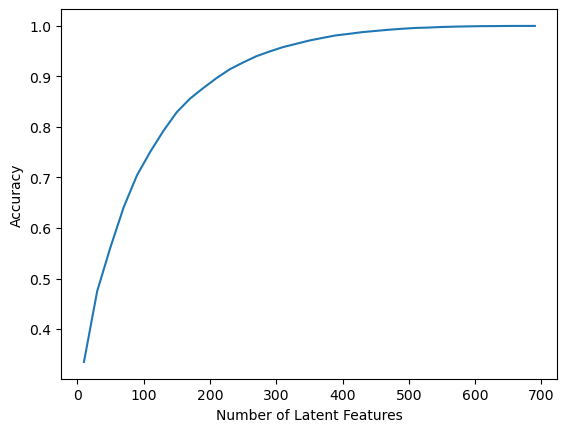

In [237]:
num_latent_features = np.arange(10, 700+10, 20)
sum_errs = []

for k in num_latent_features:
    # restructuring with the k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]

    # calculating the dot of the products
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))

    # Calculate the erros
    diffs = np.subtract(user_matrix, user_item_est)

    # total errors to keep track
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)


plt.plot(num_latent_features, 1 - np.array(sum_errs)/df.shape[0])
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')


From the above plot we are not sure how many feature to be used, so i will be splitting the datasets into train and test datasets as shown below

In [238]:
df_train = df.head(40000)
df_test = df.tail(5993)


def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe

    OUTPUT:
    user_item_train - A user-item matrix of the training dataframe
                      
    user_item_test - A user-item matrix of the testing dataframe
                    (
    test_idx - all of the test user ids
    test_arts - all of the test article ids

    '''
    # user_item_train & user_item_test matrix will have unique users against unique material id

    # user-item matrix of the training dataframe
    user_item_train = create_user_item_matrix(df_train)

    # user-item matrix of the test dataframe
    user_item_test = create_user_item_matrix(df_test)

    test_idx = list(user_item_train.index)  # ids of test users
    test_arts = list(user_item_train.columns)  # ids of test articles

    return user_item_train, user_item_test, test_idx, test_arts


user_item_train, user_item_test, test_idx, \
    test_arts = create_test_and_train_user_item(df_train, df_test)

In [239]:
user_item_test.shape

(682, 574)

In [240]:
user_item_train.shape

(4487, 714)

In [241]:
# i will replace the values in the dictionary
a = len(np.setdiff1d(user_item_test.index, user_item_train.index))
b = 574
c = 20
d = len(np.setdiff1d(user_item_test.columns, user_item_train.columns))

dict = {
    'for how many users in the test dataset are we not able to make predictions for because of the cold start problem?': a,
    'for how many articles we can make predictions for in the test dataset?': b,
    'for how many users we can make predictions for in the test dataset?': c,
    'for how many articles in the test dataset are we not able to make predictions for because of the cold start problem?': d
}

In [242]:
# i will fit the SVM on user_item_train_matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [243]:
u_train.shape

(4487, 4487)

In [244]:
s_train.shape

(714,)

In [245]:
vt_train.shape

(714, 714)

In [246]:
# Subset in the user_item_test dataset that can be predicted

# Rows that are matching with the test dataset
test_idx = user_item_test.index
row_idxs = user_item_train.index.isin(test_idx)
u_test = u_train[row_idxs, :]

In [247]:
# Columns that are matching with the test dataset
test_col = user_item_test.columns
col_idxs = user_item_train.columns.isin(test_col)
vt_test = vt_train[:, col_idxs]

In [248]:
# Test data
train_idx = user_item_train.index
row_idxs_2 = user_item_test.index.isin(train_idx)
sub_user_item_test = user_item_test.loc[row_idxs_2]

C:\Users\ankush.c\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ankush.c\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ankush.c\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass 

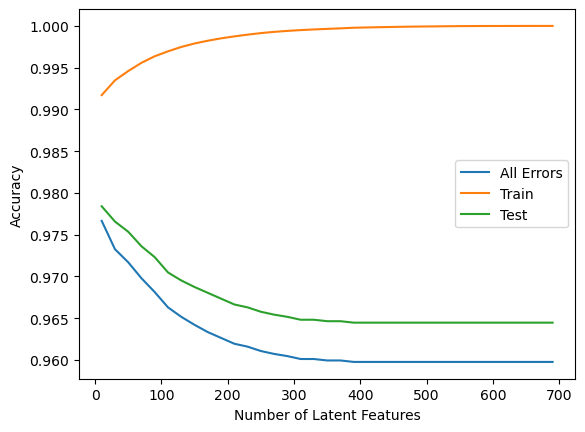

In [249]:
latent_features = np.arange(10, 700+10, 20)

all_errs, train_errs, test_errs = [], [], []


for k in latent_features:
    # restructure with k latent features
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    # taking the dot of the products
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    all_errs.append(1 - ((np.sum(user_item_test_preds)+np.sum(np.sum(sub_user_item_test)))/(sub_user_item_test.shape[0]*sub_user_item_test.shape[1])))

    # compute prediction accuracy
    train_errs.append(accuracy_score(user_item_train.values.flatten(), user_item_train_preds.flatten()))
    test_errs.append(accuracy_score(sub_user_item_test.values.flatten(), user_item_test_preds.flatten()))


plt.figure()
plt.plot(latent_features, all_errs, label='All Errors')
plt.plot(latent_features, train_errs, label='Train')
plt.plot(latent_features, test_errs, label='Test')
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy curve displays an inverse trend compared to training, indicating overfitting with increased latent features. Given small datasets, relying solely on SVD for recommendation isn't feasible. With minimal overlap between training and testing data, providing recommendations for all users is challenging. To overcome limitations, a combined approach involving multiple recommendation methods, duplicate removal, and ranking can enhance effectiveness. A/B testing can validate the efficacy of this combined recommendation strategy.